In [1]:
%pylab inline
from __future__ import print_function
from __future__ import division

Populating the interactive namespace from numpy and matplotlib


# Sinusoids and Phasors

## Trigonometric functions

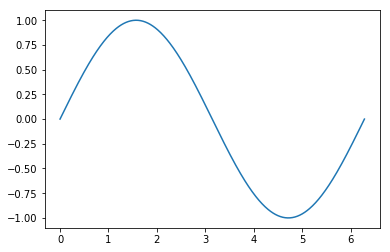

In [2]:
x = linspace(0, 2*pi, 500)
plot(x, sin(x))

http://en.wikipedia.org/wiki/Trigonometric_functions

The Sine function relates the length of the opposite side to the angle of a right angle triangle:

$$\sin(\theta)= \frac{opposite}{hypotenuse}$$

![http://upload.wikimedia.org/wikipedia/commons/0/08/Periodic_sine.PNG](http://upload.wikimedia.org/wikipedia/commons/0/08/Periodic_sine.PNG)

The Cosine function is the sine function with a 90 degree ($\frac{\pi}{2}$) phase shift. It is related to the adjacent side in a right angle triangle:


$$\cos(\theta)= \frac{adjacent}{hypotenuse}$$

![http://upload.wikimedia.org/wikipedia/commons/7/7e/Trigonometry_triangle.svg](http://upload.wikimedia.org/wikipedia/commons/7/7e/Trigonometry_triangle.svg)

# Phasor

A phase vector with constant amplitude and angular velocity.

An angle (for a constant line of length $A$) changes at a constant speed.

http://en.wikipedia.org/wiki/Phasor

$$A\cdot \cos(\omega t + \theta)$$

![http://upload.wikimedia.org/wikipedia/commons/8/89/Unfasor.gif](http://upload.wikimedia.org/wikipedia/commons/8/89/Unfasor.gif)

Now discrete:

In [3]:
theta = linspace(0,2*pi, 10, endpoint=False)
print(theta)

[ 0.          0.62831853  1.25663706  1.88495559  2.51327412  3.14159265
  3.76991118  4.39822972  5.02654825  5.65486678]


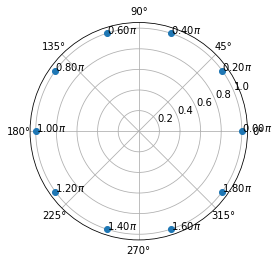

In [4]:
theta = linspace(0,2*pi, 10, endpoint=False)
r = ones_like(theta) # ones(theta.shape)
polar(theta, r, 'o')

for ang in theta:
    annotate('{:.2f}$\pi$'.format(ang/pi), xy=(ang,1))
    
    
#xticks(())
#yticks(());
#grid()

In [5]:
r

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

The separation in angles is constant, so if the separation between "samples" a constant time, then you can say the angular velocity is constant.

# Phasor arithmetic

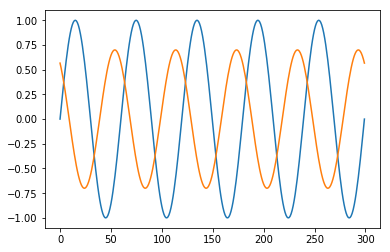

In [6]:
phs1 = linspace(0, 5 * 2*pi, 300)

y1 = sin(phs1)
y2 = 0.7 * sin(phs1 + 0.7*pi)

plot(y1)
plot(y2);

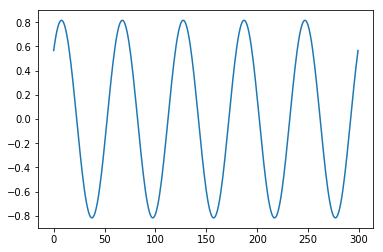

In [7]:
plot(y1 + y2);

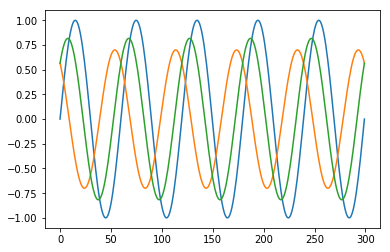

In [8]:
plot(y1)
plot(y2);
plot(y1 + y2);

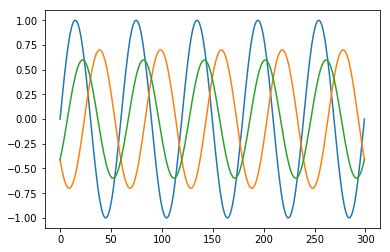

In [9]:
phs1 = linspace(0, 5 * 2*pi, 300)

y1 = sin(phs1)
y2 = 0.7 * sin(phs1 + 1.2*pi)

plot(y1)
plot(y2);
plot(y1 + y2);

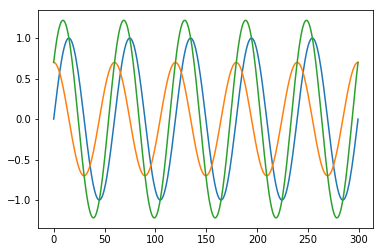

In [10]:
phs1 = linspace(0, 5 * 2*pi, 300)

y1 = sin(phs1)
y2 = 0.7 * sin(phs1 + 0.5*pi)

plot(y1)
plot(y2);
plot(y1 + y2);

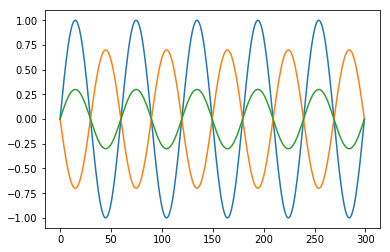

In [11]:
phs1 = linspace(0, 5 * 2*pi, 300)

y1 = sin(phs1)
y2 = 0.7 * sin(phs1 + 1*pi)

plot(y1)
plot(y2);
plot(y1 + y2);

Adding two sinusoids of the same frequency will always result in the same frequency, no matter the phase.

The resulting amplitude of the sum depends on the original sinusoids' amplitude and their phase relationships

You can easily calculate this with phasors. Adding sinusoids is the same as adding the rotating phasor vectors.

![http://upload.wikimedia.org/wikipedia/commons/9/92/Sumafasores.gif](http://upload.wikimedia.org/wikipedia/commons/9/92/Sumafasores.gif)

You can see:

* In-phase vectors add their amplitude directly
* Inverse phase (180 degree shift) vectors cancel out

But, the most interesting implication is that by adding a single phasor with initial phase of 0 with another with a 90 degree shift, a phasor with any phase and amplitude can be described. i.e.:

$$ A \cdot \sin(\omega t + \phi) = [A \cdot \cos(\phi) ]\sin(\omega t) + [A \cdot \sin(\phi)]\cos(\omega t)$$

This comes from the trigonometric identity:

$$\sin(a + b) = \sin(a)\cos(b) + \cos(a)\sin(b)$$

## Phasors in the imaginary plane

What if we consider the x-y plane, as the complex plane, where the x-axis describes the real part of a number and the y-axis the imaginary part? Then we can describe any phasor as:

$$ a \cdot \cos(\omega t) + b \cdot j \cdot \sin(\omega t)$$

![http://www.electronics-tutorials.ws/accircuits/acp75.gif](http://www.electronics-tutorials.ws/accircuits/acp75.gif)

http://en.wikipedia.org/wiki/Complex_plane

# Euler's formula

http://en.wikipedia.org/wiki/Euler%27s_formula

$$\ \ \ \ \ \ \ e^{jx} = \cos(x) + j\sin(x)$$

So Euler's formula describes a phasor in two different ways!

And:

$$\cos(\omega t) = \mathrm{Re}[ e^{j\omega t}] $$

$$\sin(\omega t) = \mathrm{Im}[ e^{j\omega t}] $$

$$ \ \ \ \ e^{j\pi} + 1 = 0 $$

# Adding sinusoids

In [12]:
amp_harm_rel = lambda x: 1.0/x
print(amp_harm_rel)

amp_harm_rel(5)

<function <lambda> at 0x10cc67d08>


0.2

Equivalent to:

In [13]:
def amp_harp_rel_func(x):
    return 1.0/x

print(amp_harp_rel_func)

amp_harp_rel_func(5)

<function amp_harp_rel_func at 0x10cc67c80>


0.2

In [14]:
amp_harm_rel = lambda x: 1.0/x
harmonics = arange(30) + 1
print(harmonics)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30]


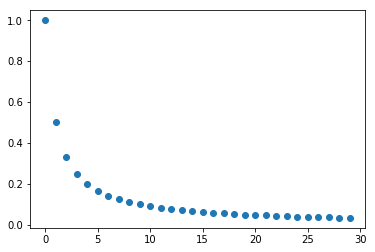

In [15]:
amps = amp_harm_rel(harmonics)
plot(amps, 'o')

In [16]:
zip(harmonics,amps)

In [17]:
zip(harmonics,arange(20))

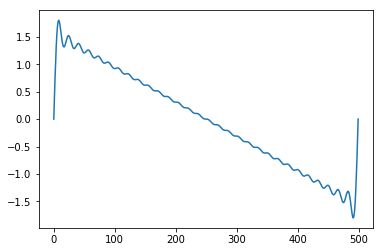

In [18]:
x = linspace(0, 2*pi, 500)
out = zeros_like(x)
for harm, amp in zip(harmonics,amps):
    out += amp * sin(x*harm)

plot(out)

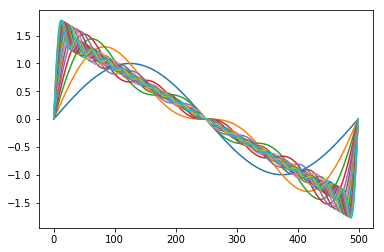

In [19]:
def add_harmonics(num, amp_harm_rel, numpoints=500):
    x = linspace(0, 2*pi, numpoints)
    out = zeros_like(x)
    harmonics = arange(num) + 1
    amps = amp_harm_rel(harmonics)
    for harm, amp in zip(harmonics,amps):
        out += amp * sin(x*harm)
    return out

amp_harm_rel = lambda x: 1.0/x
for i in range(20):
    plot(add_harmonics(i + 1, amp_harm_rel))

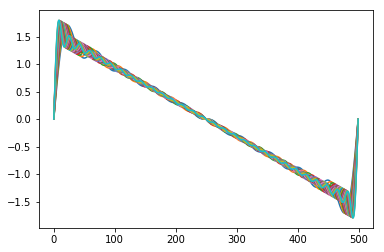

In [20]:
amp_harm_rel = lambda x: 1.0/x
for i in range(20):
    plot(add_harmonics(i + 10, amp_harm_rel))

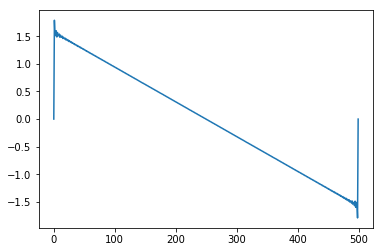

In [21]:
plot(add_harmonics(300, amp_harm_rel))

Adding sine wave and its harmonics at amplitude of $\frac{1}{N}$ produces a saw wave.

We also saw that adding sine waves with the same amplitude results in a bi-polar impulse:

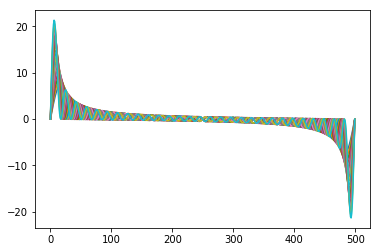

In [22]:
def amp_harm_rel(x):
    return ones_like(x)

for i in range(20):
    plot(add_harmonics(i + 10, amp_harm_rel))

Adding only the odd harmonics witha amplitude of $\frac{1}{N}$ produces a square wave:

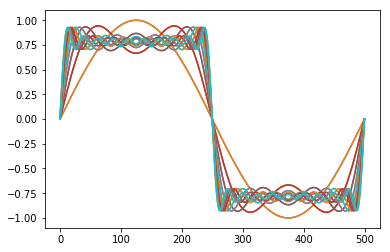

In [23]:
amp_harm_rel = (lambda x: ceil(x/2.0 - (x/2).astype(int)) * 1.0/x)
for i in range(20):
    plot(add_harmonics(i + 1, amp_harm_rel))

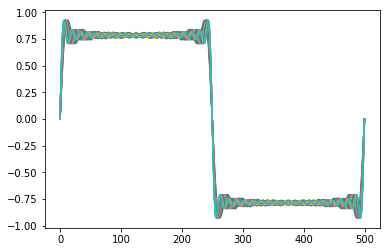

In [24]:
amp_harm_rel = (lambda x: ceil(x/2.0 - (x/2).astype(int)) * 1.0/x)
for i in range(20):
    plot(add_harmonics(i + 20, amp_harm_rel))

These are all examples of *Fourier Series*, which allow calculating a continuous periodic function through the sum of simple sinusoids.

http://en.wikipedia.org/wiki/Fourier_series

http://www.encyclopediaofmath.org/index.php/Fourier_series

![http://upload.wikimedia.org/wikipedia/commons/2/2b/Fourier_series_and_transform.gif](http://upload.wikimedia.org/wikipedia/commons/2/2b/Fourier_series_and_transform.gif)

A Fourier series is described as:

$$s_N(x) = \frac{a_0}{2} + \sum_{n=1}^N A_n\cdot \sin(\tfrac{2\pi nx}{P}+\phi_n)$$

# Fourier transform

Fourier's theorem

Any periodic function can be written as a Fourier series. i.e. any periodic function can be written as a sum of harmonic phasors.

$$S(f) = \int_{-\infty}^{\infty} s(t) \cdot e^{- i 2\pi f t} dt$$

Which is multiplying the input function by a phasor of the "input" frequency.

## Discrete Fourier Transform

When working with discrete data, you need to use the Discrete Fourier Transform (DFT):

$$X_k = \sum_{n=0}^{N-1} x_n \cdot e^{-i 2 \pi k n / N}$$

http://en.wikipedia.org/wiki/Discrete_Fourier_transform

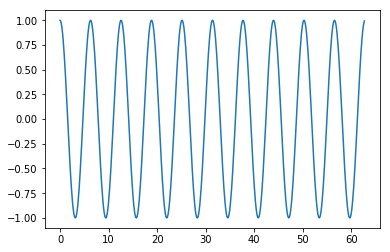

In [25]:
phs = linspace(0, 10* 2 * pi, 512, endpoint=False)
x = cos(phs)
plot(phs, x)

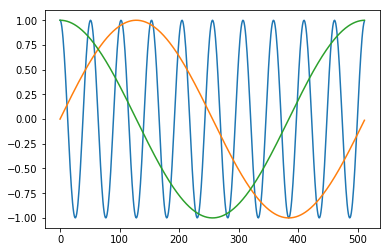

In [26]:
phasor_phs = linspace(0, 2 * pi, 512, endpoint=False)
plot(x)
plot(sin(phasor_phs))
plot(cos(phasor_phs))

In [27]:
60*44100

2646000

(-1.7541523789077473e-14, -1.9317880628477724e-14)

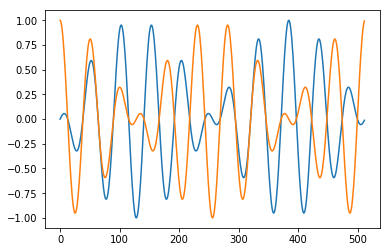

In [28]:
plot(x*sin(phasor_phs))
plot(x*cos(phasor_phs))
sum(x*sin(phasor_phs)), sum(x*cos(phasor_phs))

(6.2796989830360417e-16, -2.0983215165415459e-14)

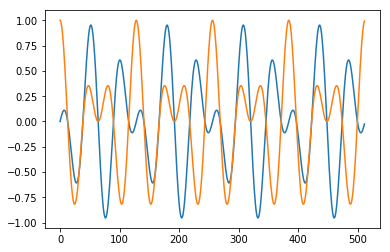

In [31]:
plot(x*sin(2*phasor_phs))
plot(x*cos(2*phasor_phs))
sum(x*sin(2*phasor_phs)), sum(x*cos(2*phasor_phs))

(-7.1054273576010019e-15, -2.7533531010703882e-14)

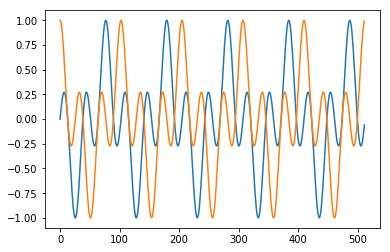

In [32]:
plot(x*sin(5*phasor_phs))
plot(x*cos(5*phasor_phs))
sum(x*sin(5*phasor_phs)), sum(x*cos(5*phasor_phs))

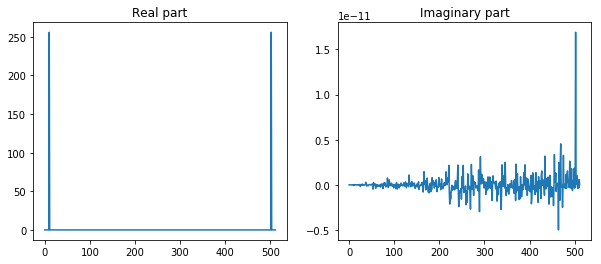

In [33]:
dft = []
for k in range(len(x)):
    fft_bin = complex(sum(x*cos(k * phasor_phs)), sum(-x*sin(k * phasor_phs)))
    dft.append(fft_bin)

subplot(121)
plot(real(dft))
title('Real part')

subplot(122)
plot(imag(dft))
title('Imaginary part')

gcf().set_figwidth(10)

(0, 20)

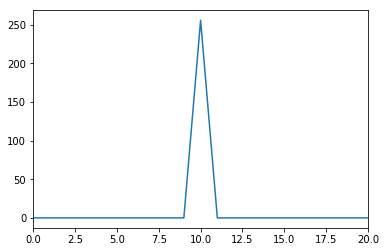

In [34]:
plot(real(dft))
xlim((0, 20))

(500, 512)

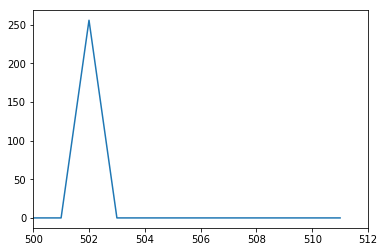

In [35]:
plot(real(dft))
xlim((500,512))

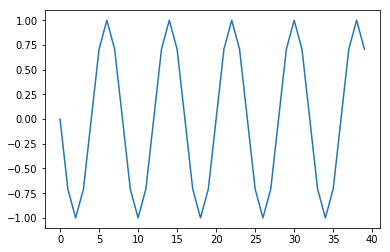

In [36]:
phs_alias = linspace(0, 35* 2*pi, 40, endpoint=False)
plot(sin(phs_alias))

The hypotenuse of the complex number in the complex plane is the magnitude of the component and the angle is the phase. If you plot all hypotenuses, you get what's called the *Magnitude spectrum*:

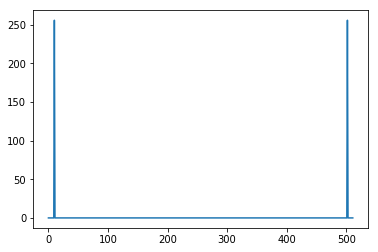

In [37]:
plot(hypot(real(dft), imag(dft)))

(0, 50)

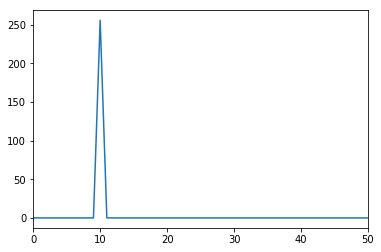

In [38]:
plot(hypot(real(dft), imag(dft)))
xlim((0, 50))

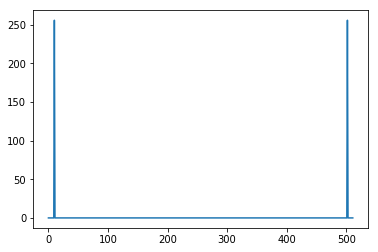

In [39]:
plot(real(fft.fft(x)))

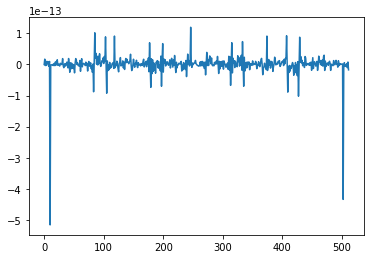

In [40]:
plot(imag(fft.fft(x)))

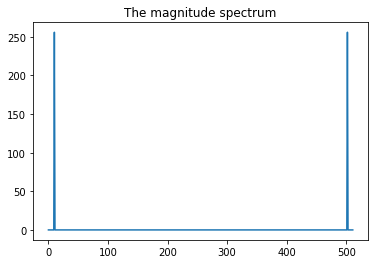

In [41]:
plot(abs(fft.fft(x)))
title('The magnitude spectrum')

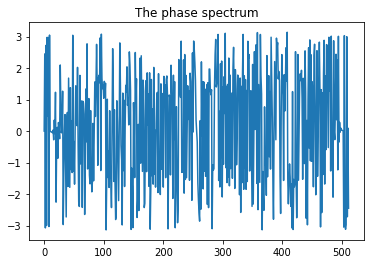

In [42]:
plot(angle(fft.fft(x)))
title('The phase spectrum')

(0, 20)

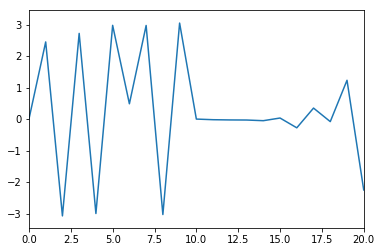

In [43]:
plot(angle(fft.fft(x)))
xlim((0, 20))

(0, 20)

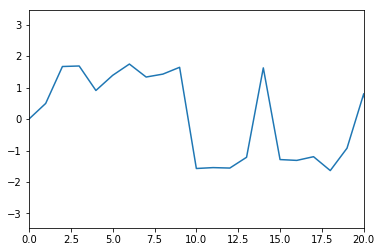

In [44]:
plot(angle(fft.fft(sin(phs))))
xlim((0, 20))

By: Andrés Cabrera mantaraya36@gmail.com
For MAT course MAT 201A at UCSB

This ipython notebook is licensed under the CC-BY-NC-SA license: http://creativecommons.org/licenses/by-nc-sa/4.0/

![http://i.creativecommons.org/l/by-nc-sa/3.0/88x31.png](http://i.creativecommons.org/l/by-nc-sa/3.0/88x31.png)